In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats
import itertools
from trapezoid import *
from functions import *
from constants import *

In [2]:
df_all = pd.read_csv("train.csv").rename(name_remap, axis=1)
train_split = np.random.random(df_all.shape[0]) < 0.9
df_train = df_all[train_split]
df_dev = df_all[~train_split]

In [3]:
df_all = pd.read_csv("train.csv").rename(name_remap, axis=1)
train_split = np.random.random(df_all.shape[0]) < 0.9
df_train = df_all[train_split]
df_dev = df_all[~train_split]

TypeError: Field elements must be 2- or 3-tuples, got ''xchg''

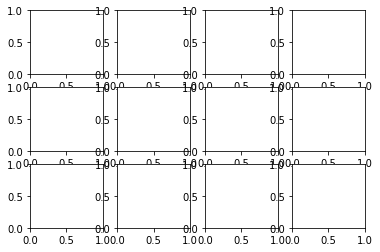

In [49]:
fig, axs = plt.subplots(3, 4)

trapezoid_df = pd.DataFrame([], indexby=pd.MultiIndex([], ['xchg', 'stk']), columns=["x1", "x2", "yl", "ymid", "yr"])

for i, j, k in itertools.product(range(len(exchanges)), range(len(stocks)), range(1)):
    xchg = exchanges[i]
    stk = stocks[j]
    # part = parties[k]
    part = 'R'
    df = df_train[(df_train.xchg == xchg) & (df_train.stk == stk) & (df_train.cp == part)]

    row = k * 3 + i
    col = j

    xs, ys, yerrs = bin_helper(df.sm, df.real_edge - df.pred_edge, 40)
    axs[row][col].errorbar(xs, ys, yerrs)

    trap = learn_trapezoid(xs, ys, yerrs)
    ls = np.linspace(-100, 100, 100)
    axs[row][col].plot(ls, [trap.calc(x) for x in ls], c='r', linewidth=5)
    axs[row][col].set_title(f"{xchg} {stk} {part}")
    axs[row][col].axhline(0, c='r')

    """
    trapezoid_df.loc[].append({
        "x1": trap.x1,
        "x2": trap.x2,
        "yl": trap.yl,
        "ymid": trap.ymid,
        "yr": trap.yr,
    })
    """

# trapezoid_df.to_csv("trapezoids.csv")

fig.set_size_inches(25, 15)

In [ ]:
trapezoid_df

,x1,x2,yl,ymid,yr
xchg,NaN,NaN,NaN,NaN,NaN
stk,NaN,NaN,NaN,NaN,NaN
